### DSC630 : Predictive Analysis
### Week :3
### Swapnil Chavan
### Date: 9/15/2024
### Mentor: Prof. Frank Neugebauer

##### Problem Statement

In this assignment, you will be using data on the Los Angeles Dodgers Major League Baseball (MLB) team located here: dodgers.csv. Use this data to make a recommendation to management on how to improve attendance. Tell a story with your analysis and clearly explain the steps you take to arrive at your conclusion. This is an open-ended question, and there is no one right answer. You are welcome to do additional research and/or use domain knowledge to assist your analysis, but clearly state any assumptions you make.
Please make sure to follow the below submission instructions carefully or it will result in having to resubmit or losing points if repeated incorrect submissions are made.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_dogers = pd.read_csv("dodgers-2022.csv")

In [5]:
df_dogers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


The data is read in pandas dataframe. Checking the metadata now.

In [6]:
df_dogers.shape

(81, 12)

There are 81 entries and 12 columns. 

In [7]:
print(df_dogers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB
None


The data looks fairly clean so I am not doing any data cleanup here.

Target variable for this analysis is attend. I need to check what is the relationshio of attendance with all other variables.

I will check monthwise attendance first.

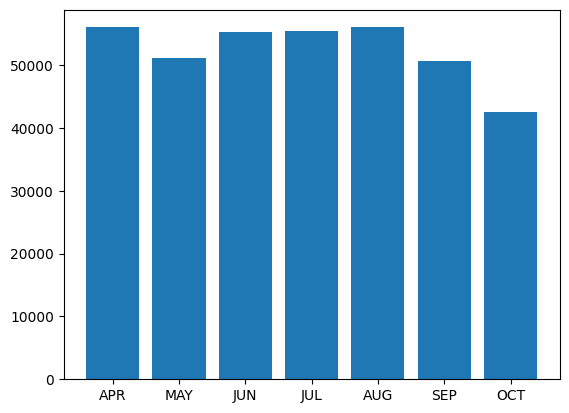

In [17]:
plt.bar(df_dogers['month'],height=df_dogers['attend'])
plt.show()

April, June,  July and August has more attendance comparatively.

I have aready checked the trend for each month. The next thing I am going to compare the trend for each month & each variable with attendance.

Below code snippet is to make the months' list because we need to to loop over the months. I am going to pass each column dynamically so that the same code should generate the bar graph for each variable.

In [54]:
mth_list = df_dogers.month.unique()
col_list = cols_list = df_dogers.columns.tolist()
col_list.remove('attend')
col_list.remove('month')

In [55]:
print(col_list)

['day', 'day_of_week', 'opponent', 'temp', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead']


In below code I am using column's list to loop over and within that I will loop over the months.

As it enters in the inner loop, I am creating a dataframe by adding a month filter. Using that dataframe it is going to plot the bar chart between the variable in current iteration and the attendance.

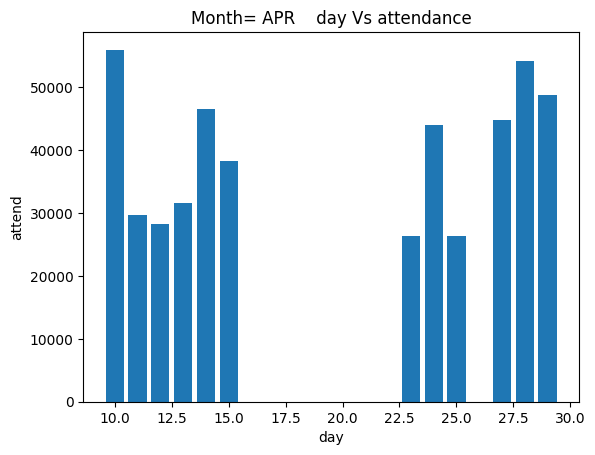

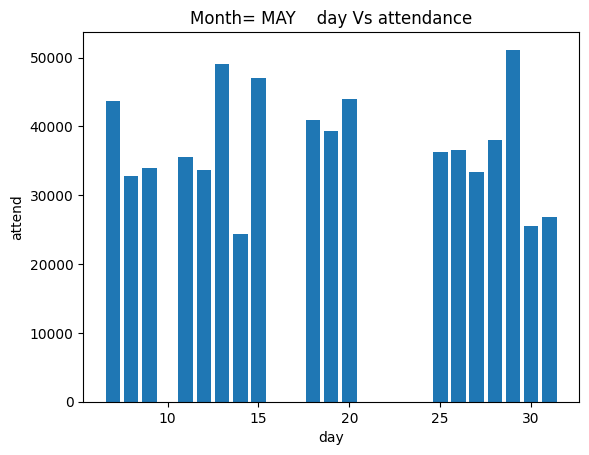

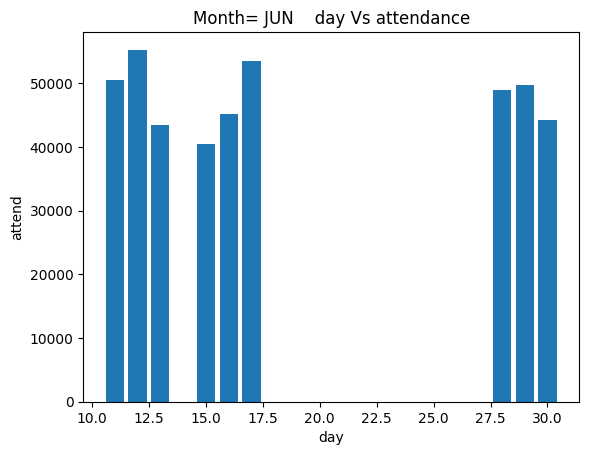

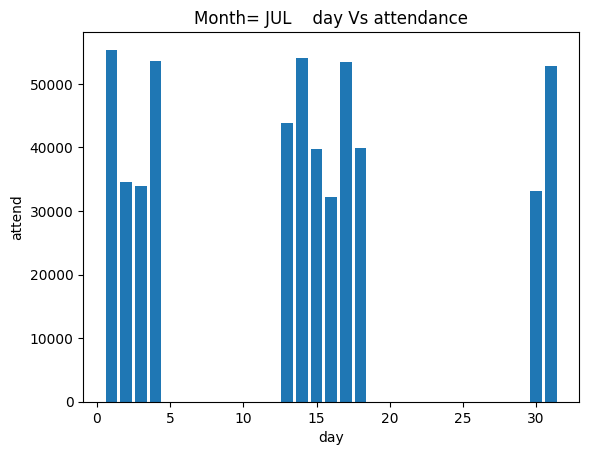

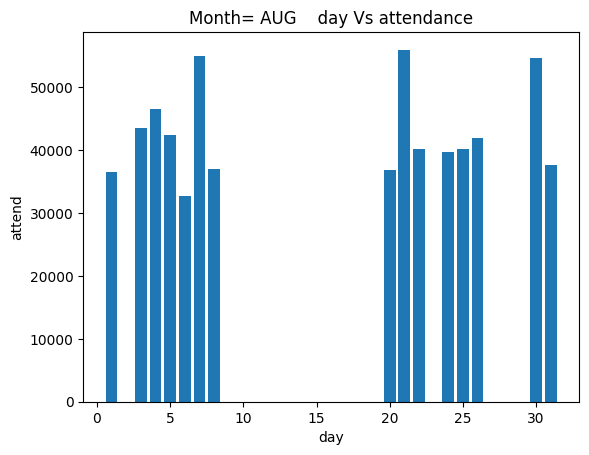

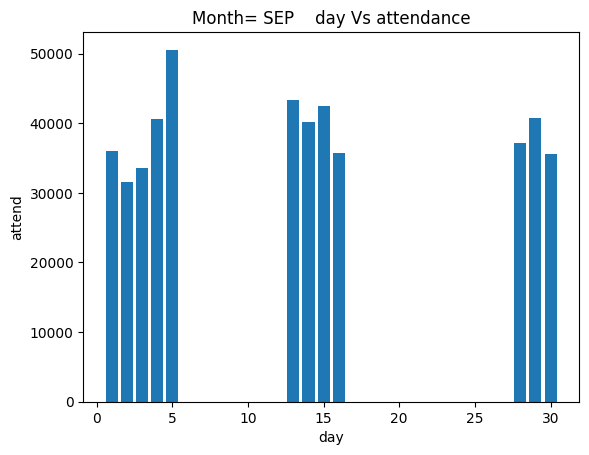

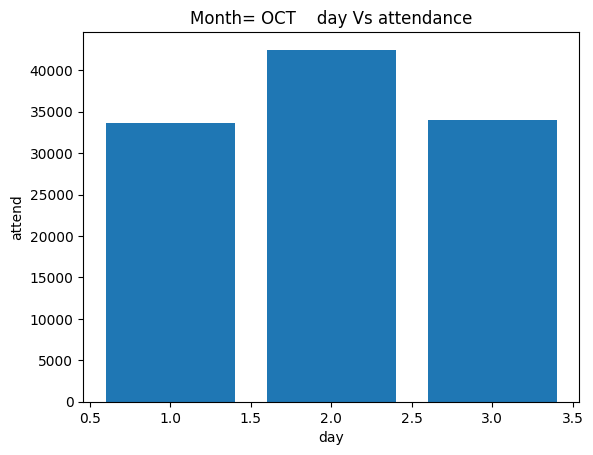

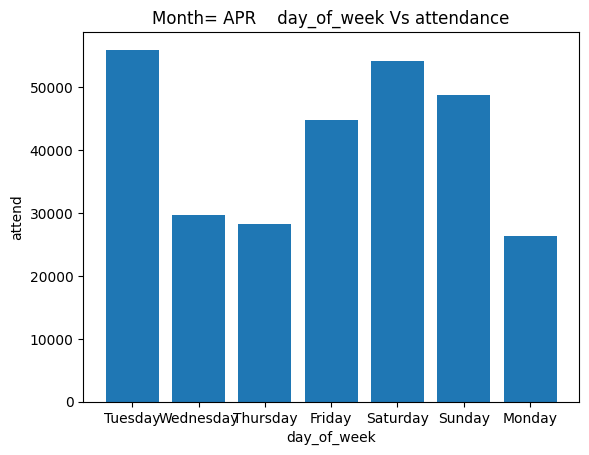

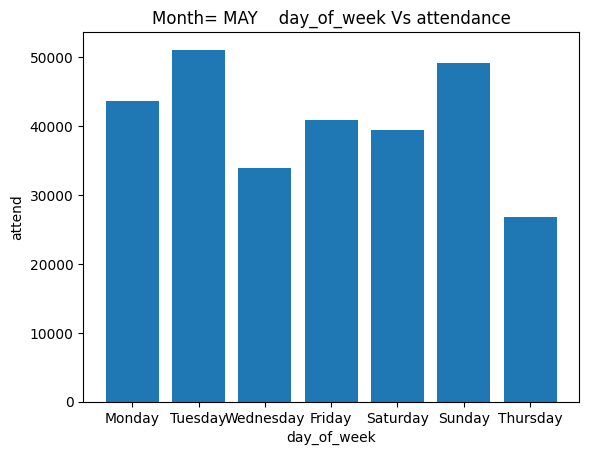

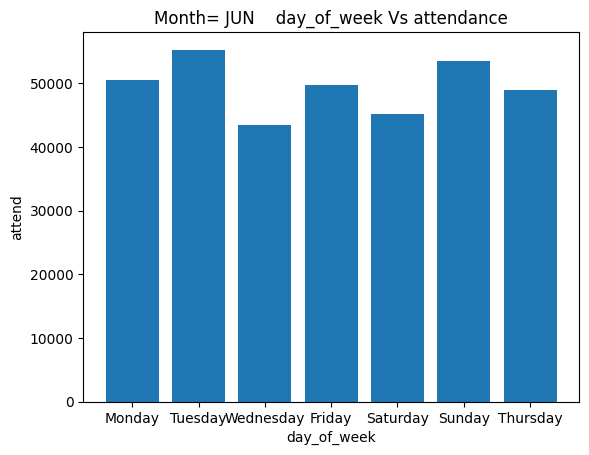

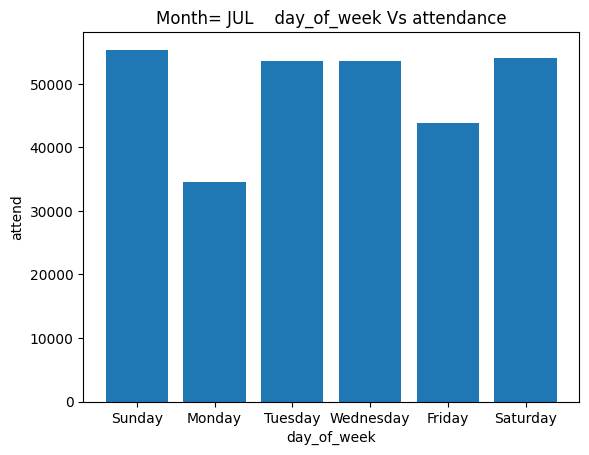

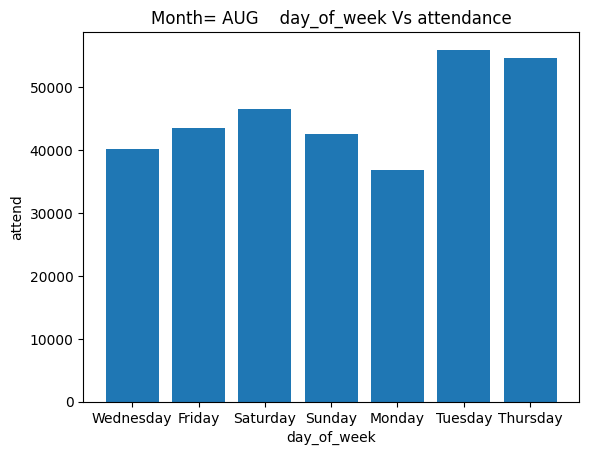

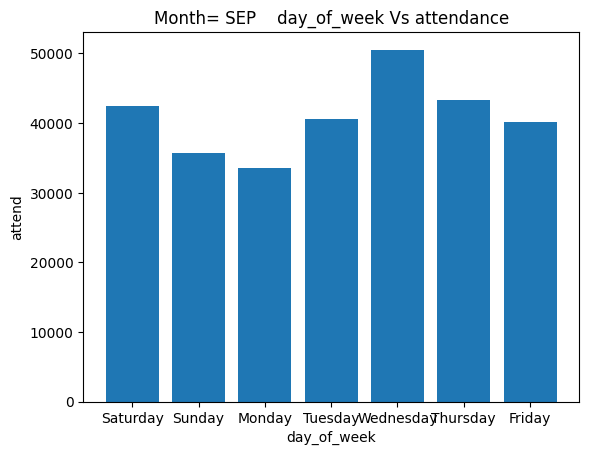

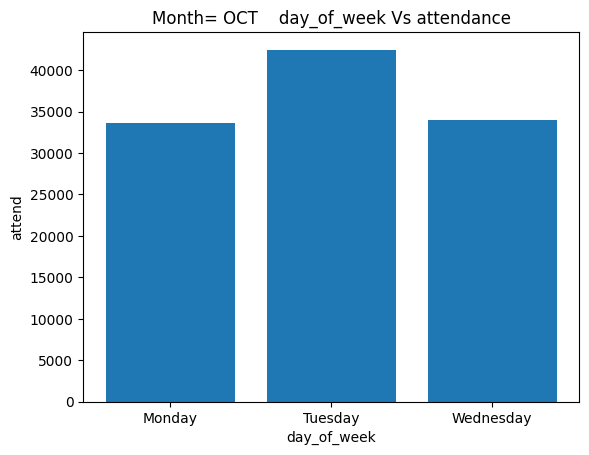

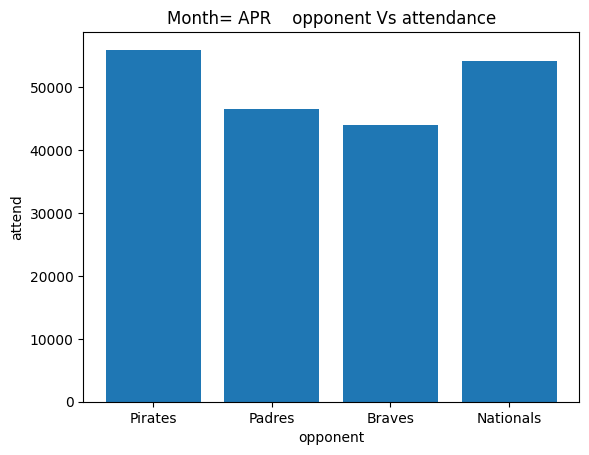

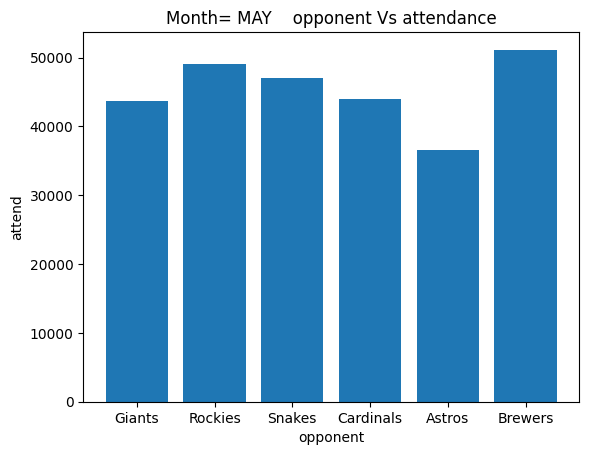

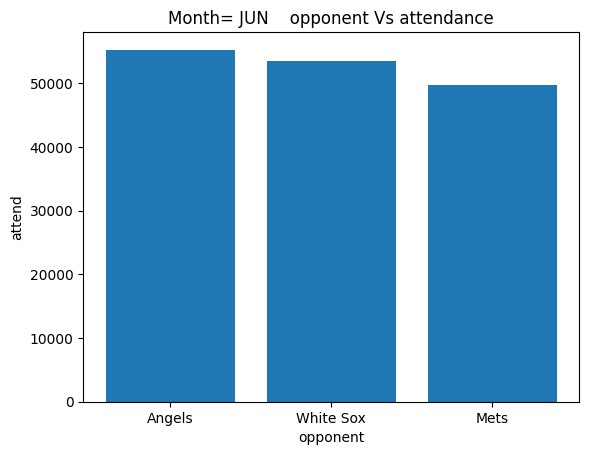

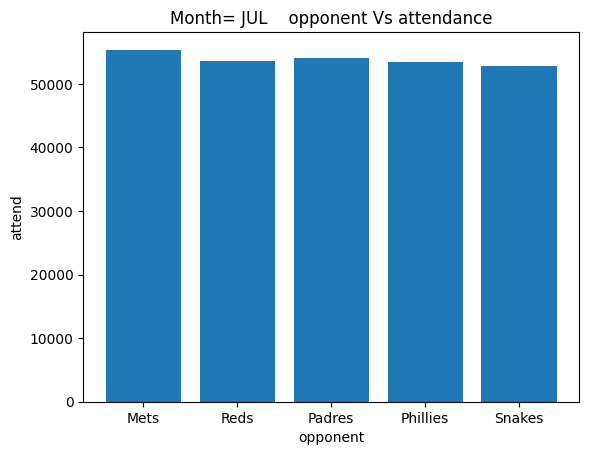

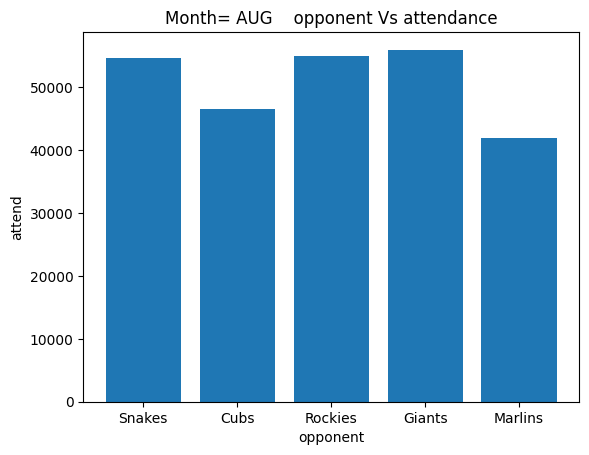

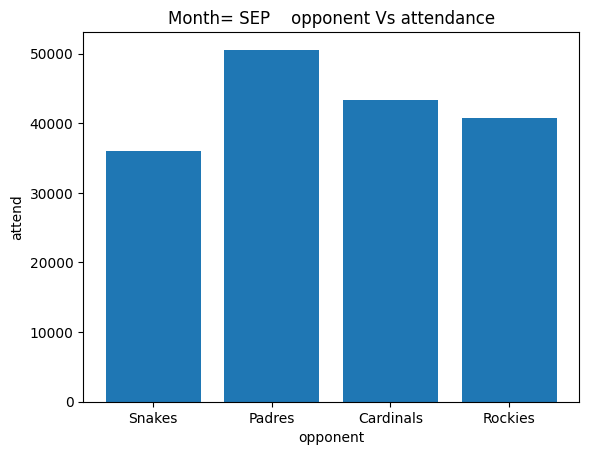

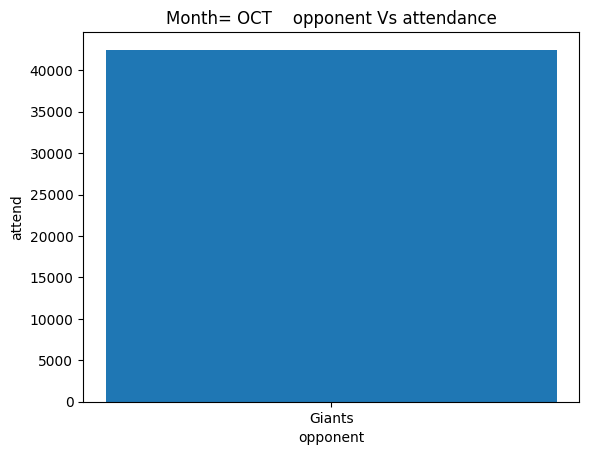

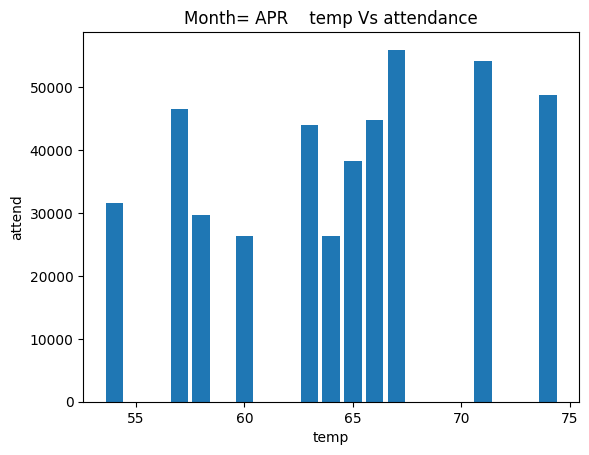

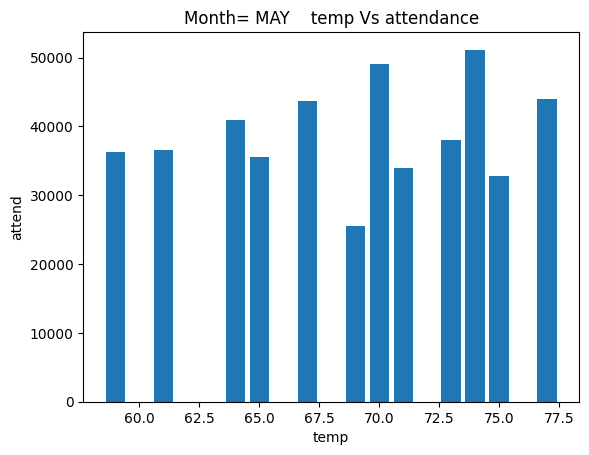

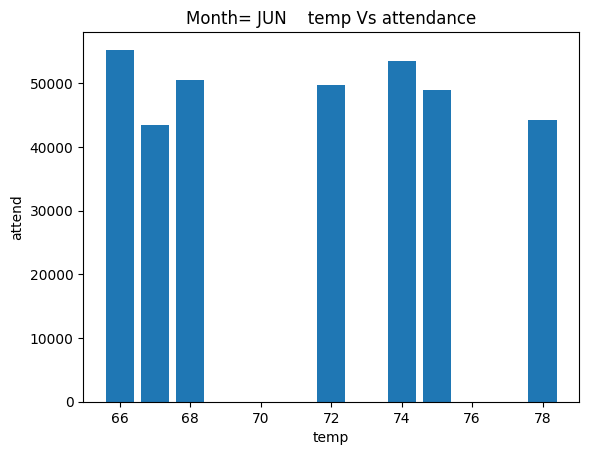

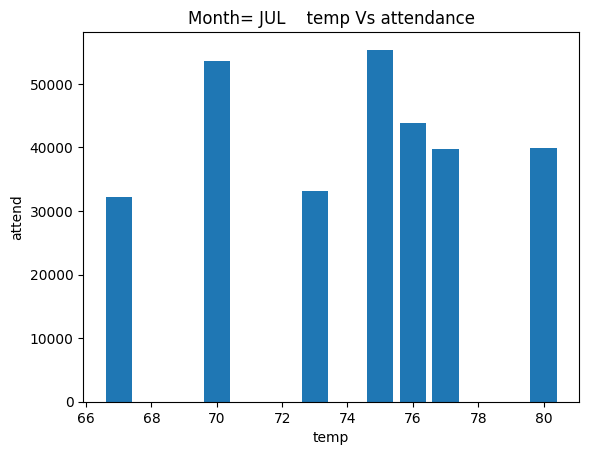

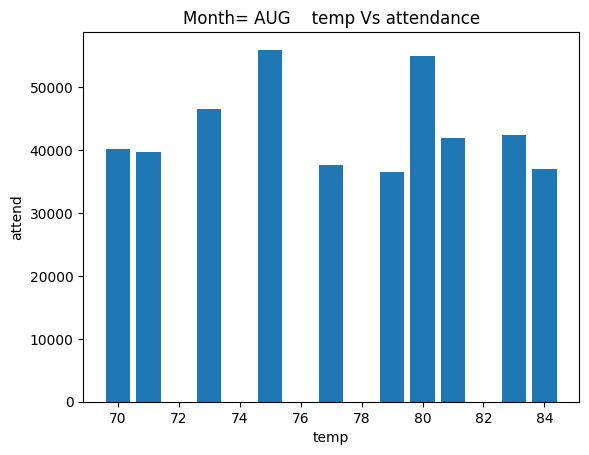

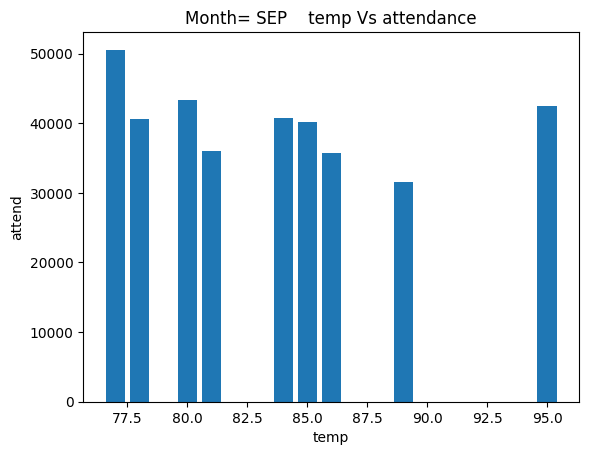

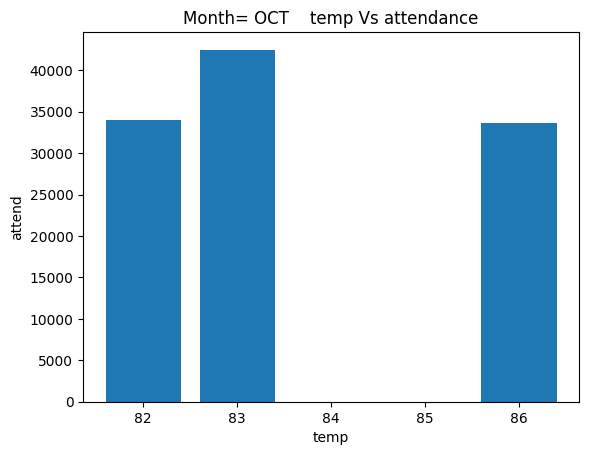

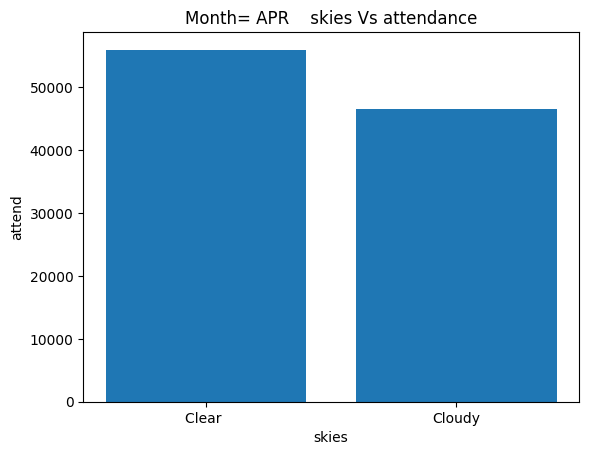

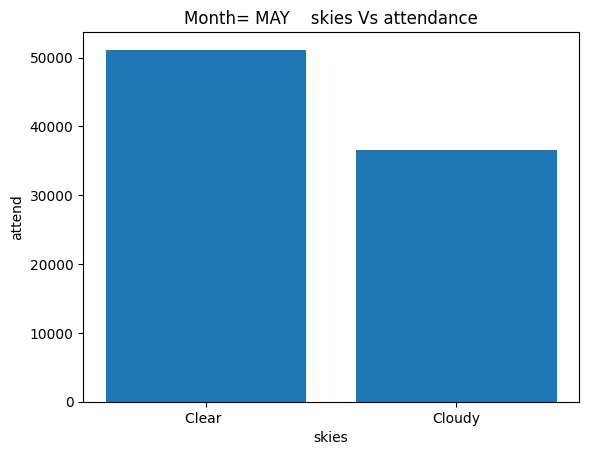

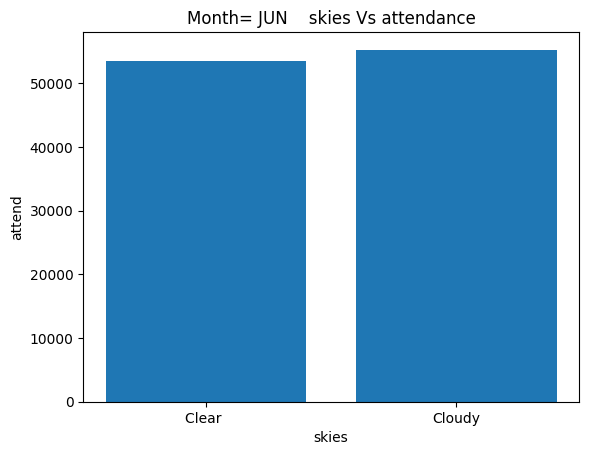

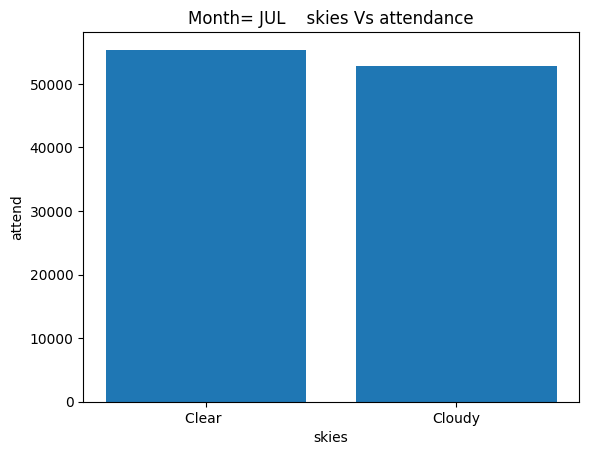

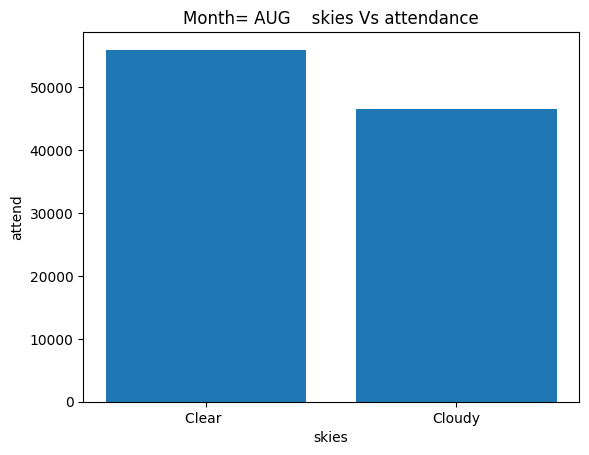

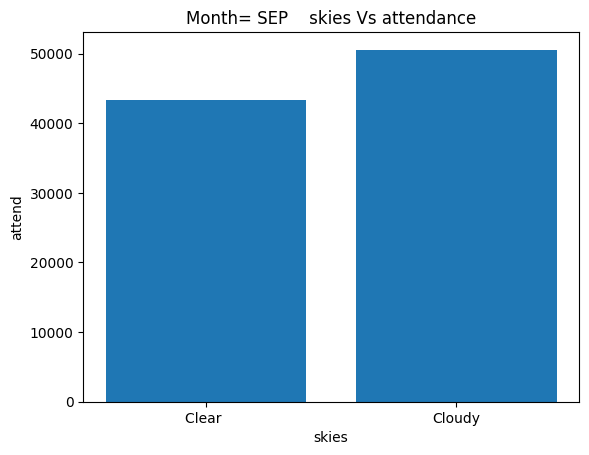

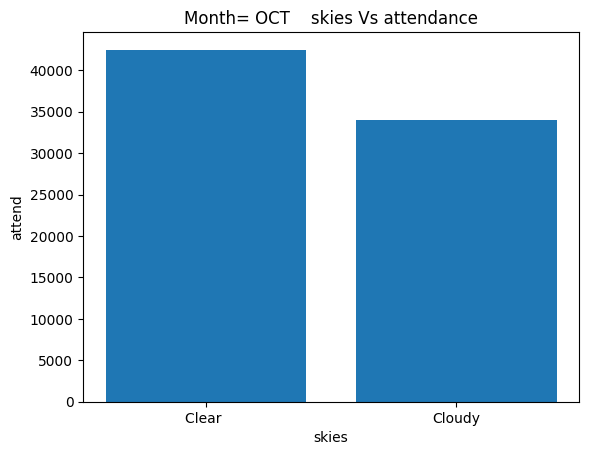

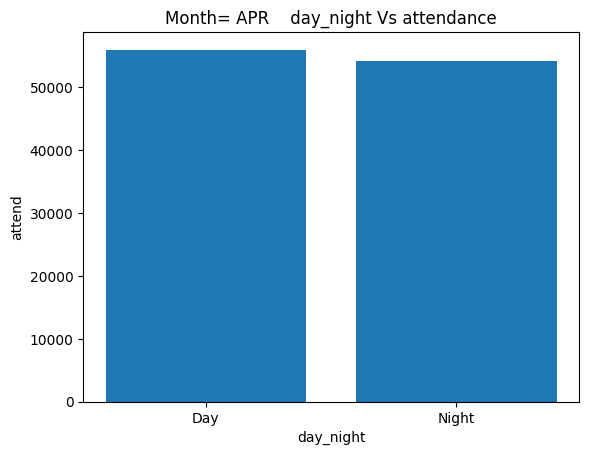

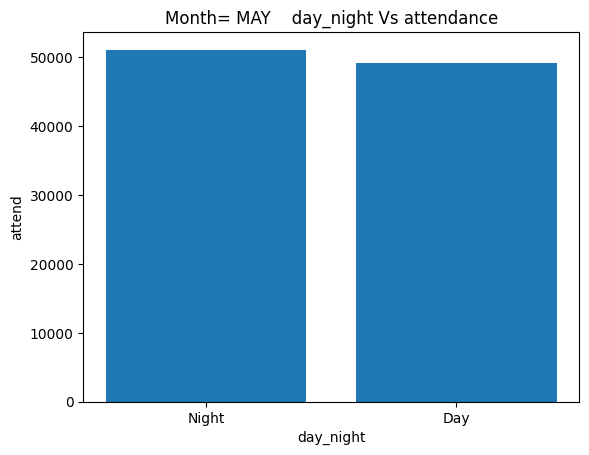

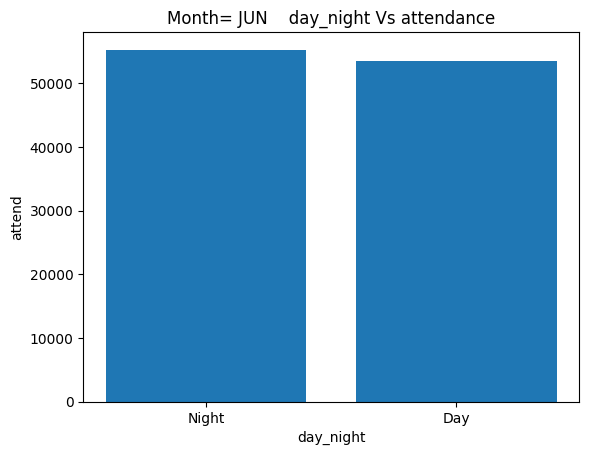

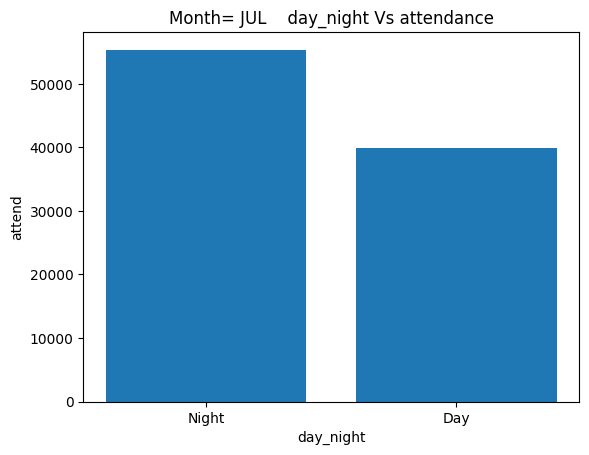

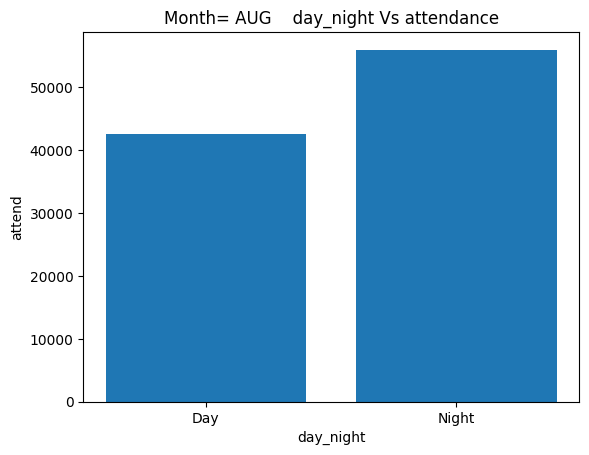

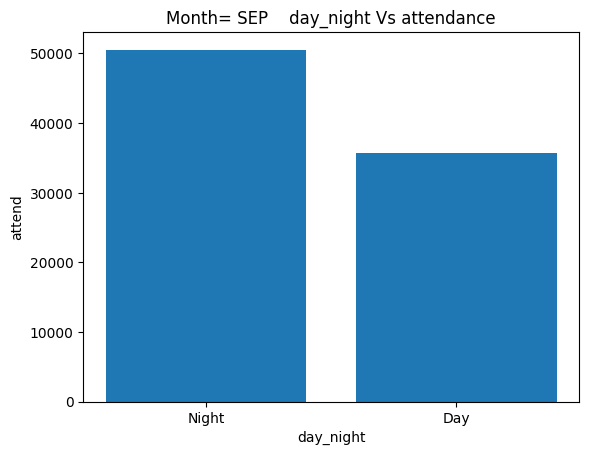

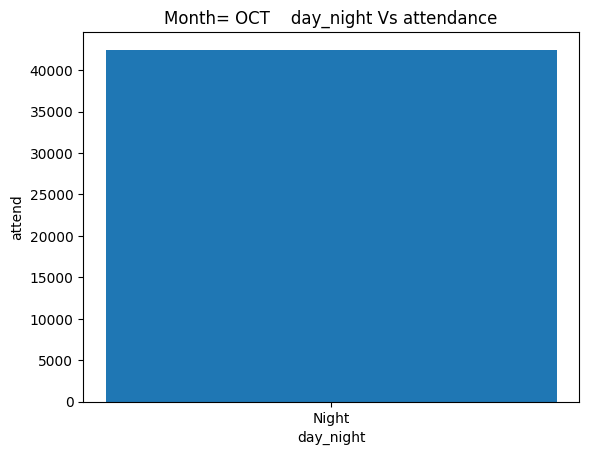

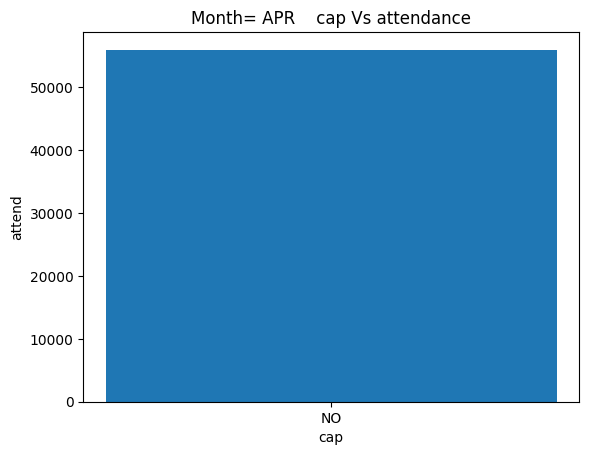

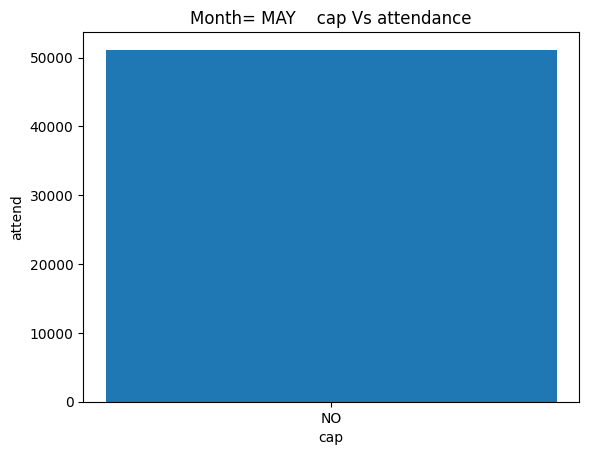

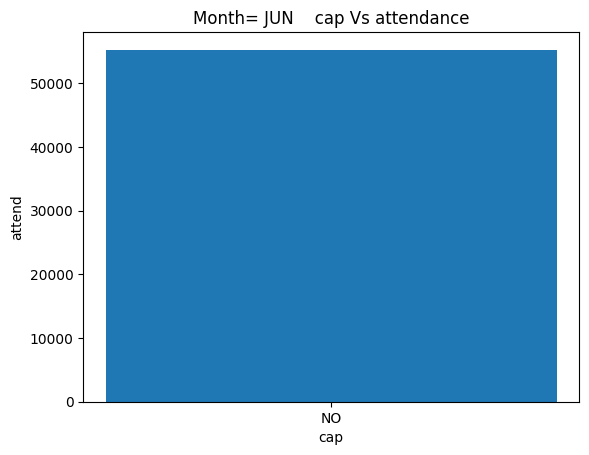

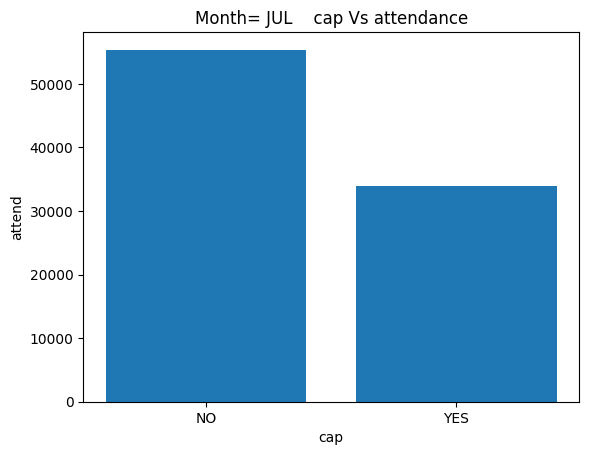

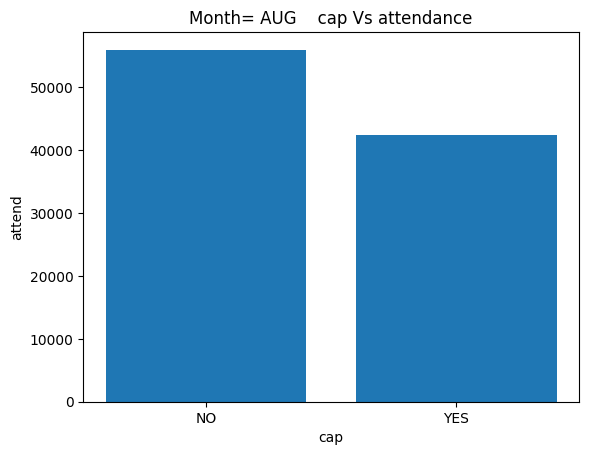

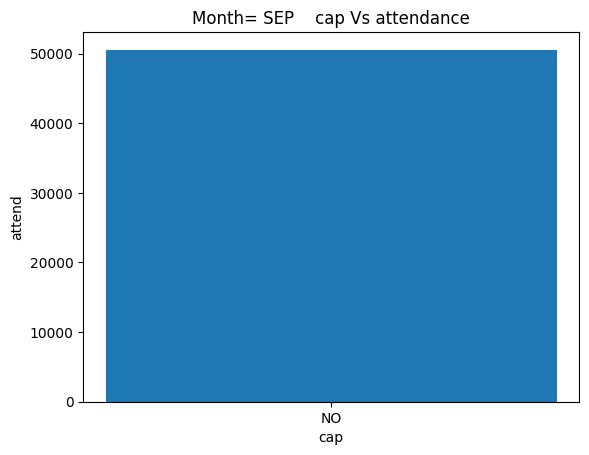

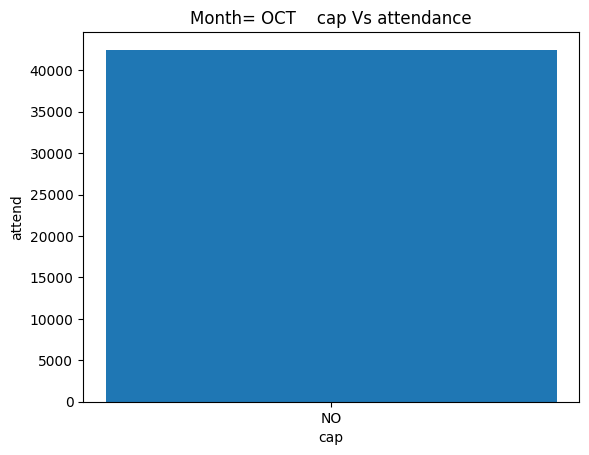

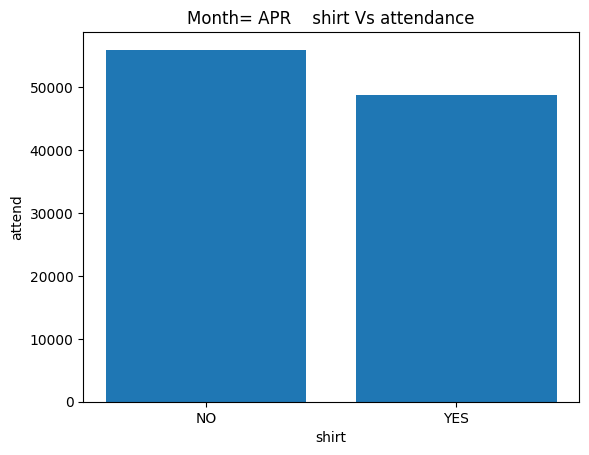

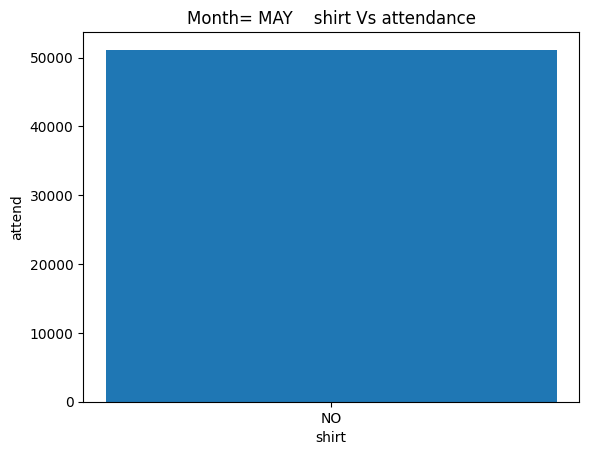

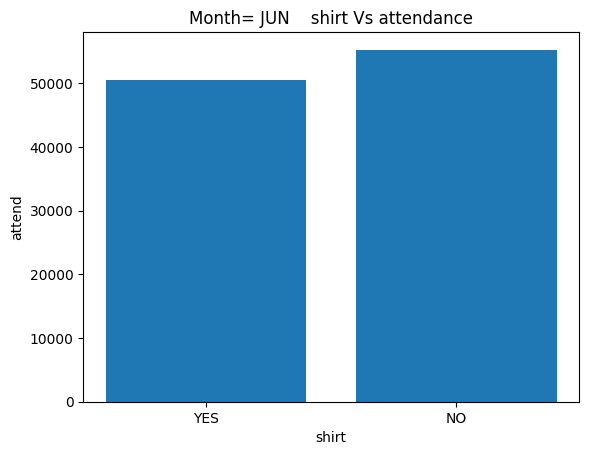

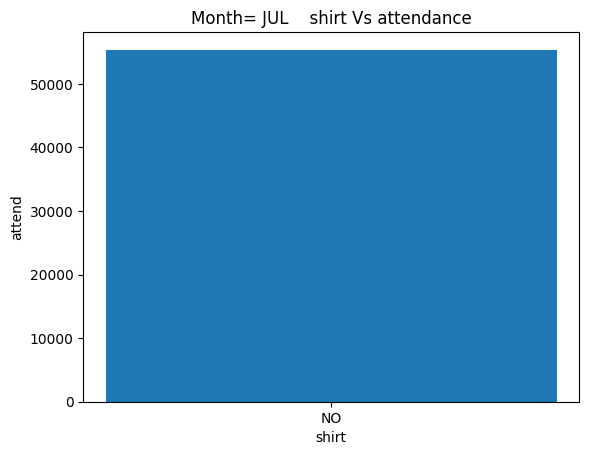

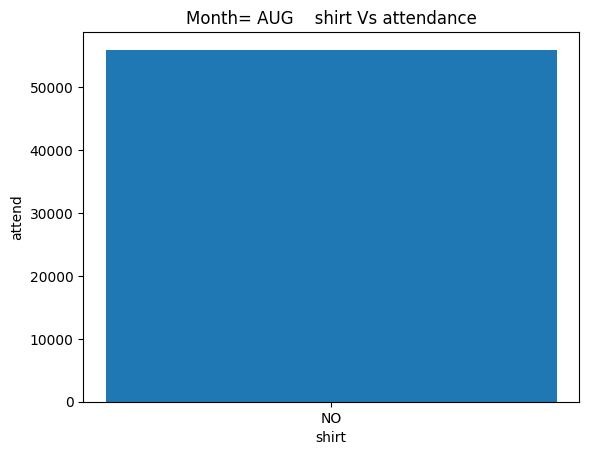

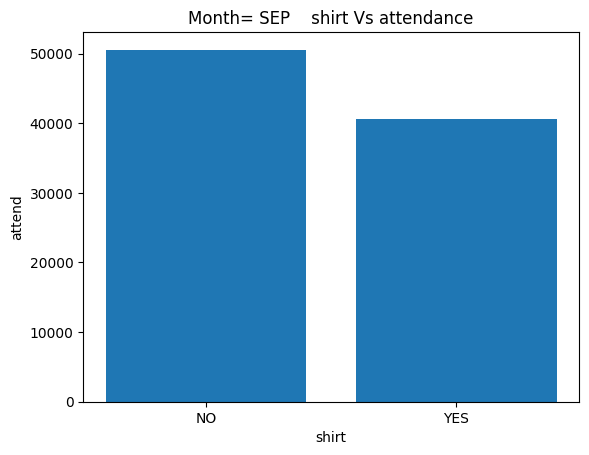

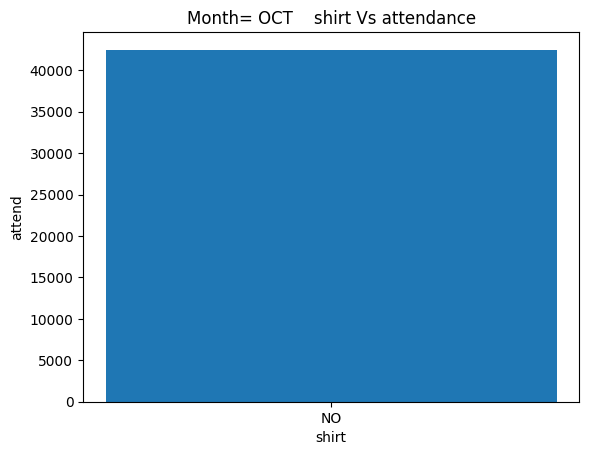

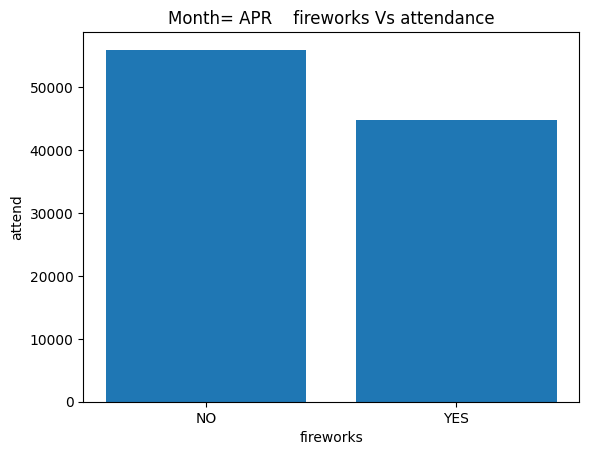

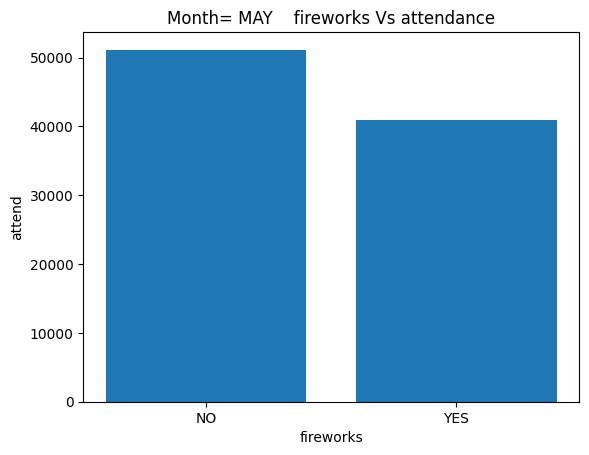

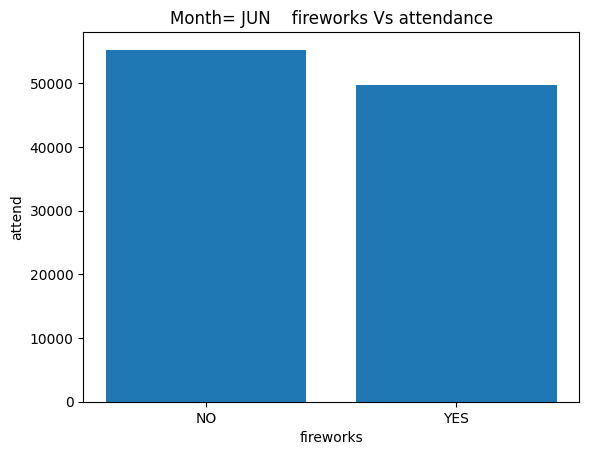

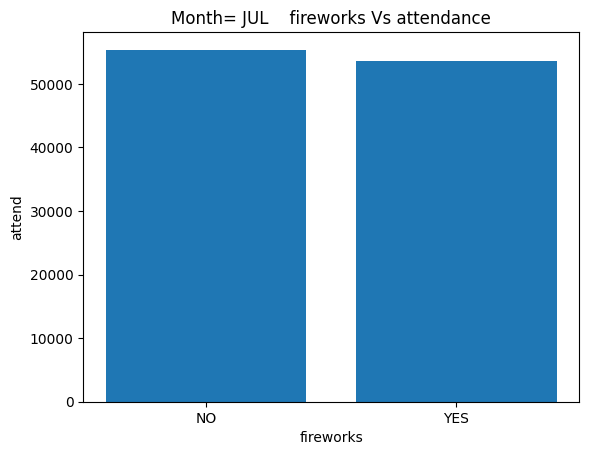

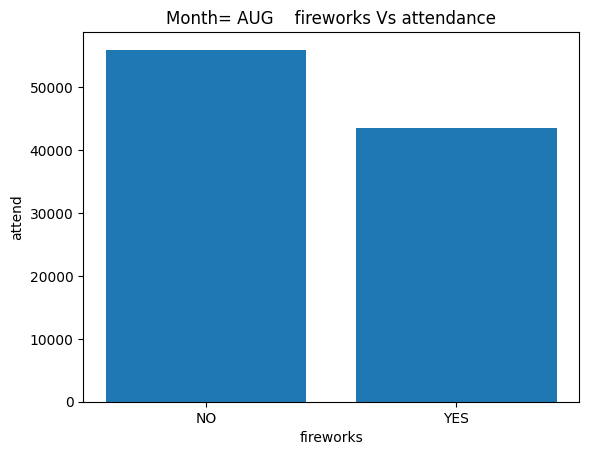

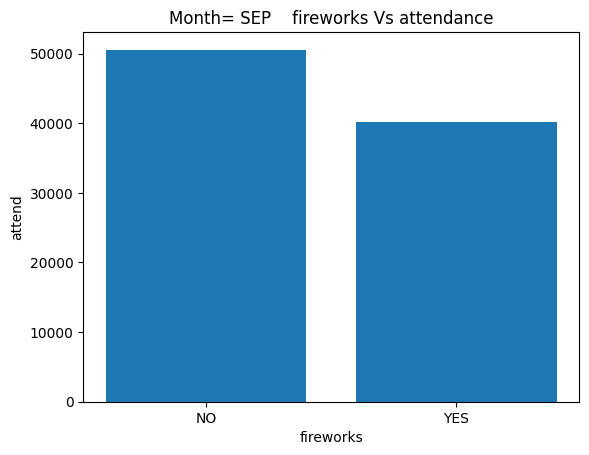

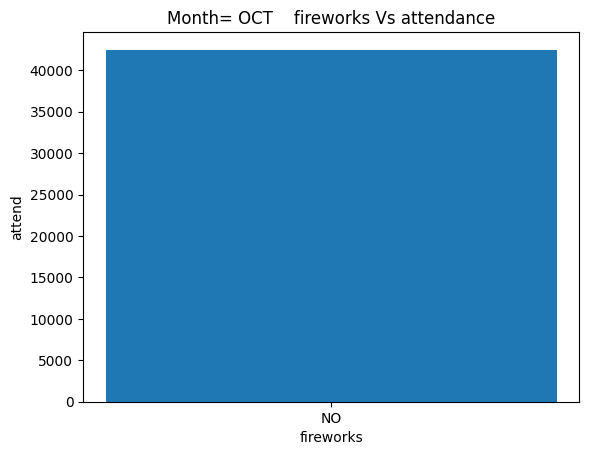

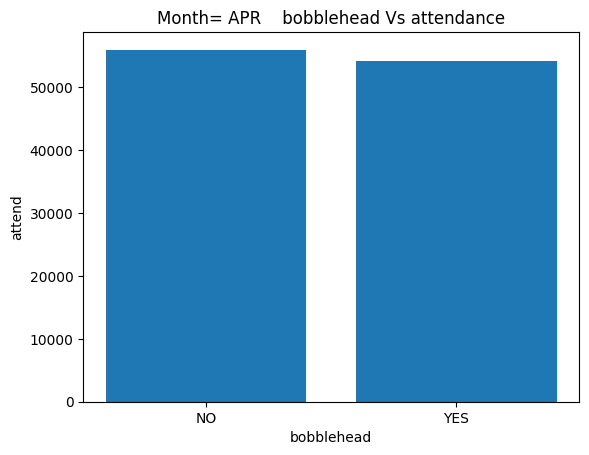

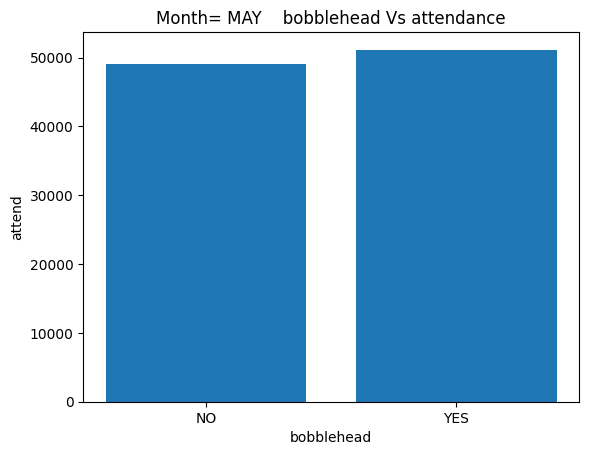

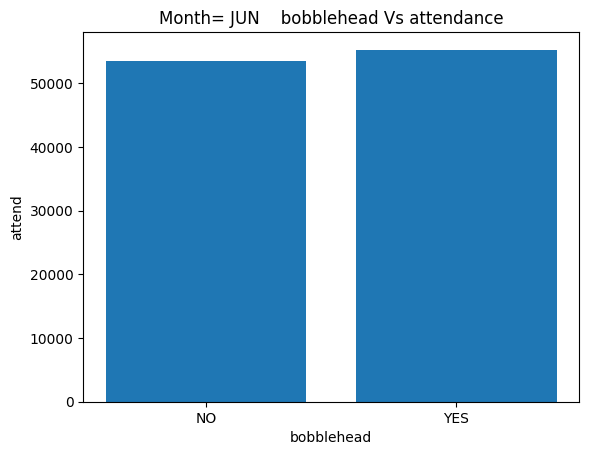

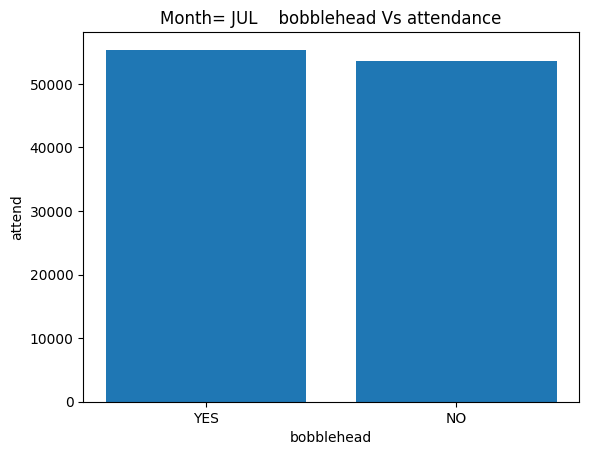

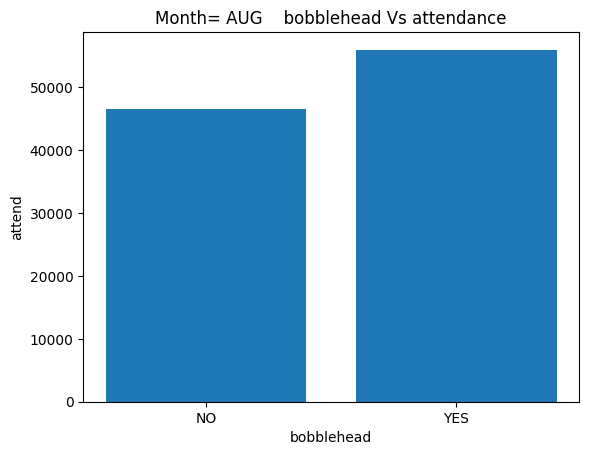

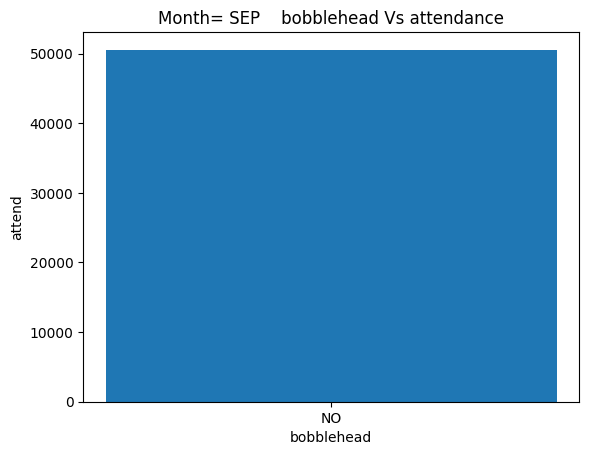

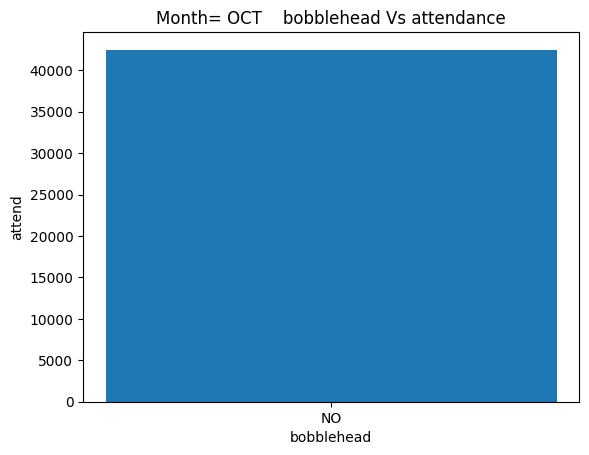

In [47]:
for c in col_list:
    for i in mth_list:
        df = df_dogers[df_dogers['month'] == i]
        title = "Month= " + i + "    " + c + " Vs attendance"
        plt.bar(df[c],height=df['attend'])
        plt.title(title)
        plt.xlabel(c)
        plt.ylabel('attend')        
        plt.show()


My Observations and recommendation to management based on the bar graphs above to improve the attendance

* Schedule more games on Saturdays. Saturdays are the day of the week with the highest attendance
* Offer more bobblehead promotions. Bobblehead promotions have been shown to increase attendance.
* Schedule more night matches than the day ones. The nigh matches have shown increase in the attendance.
* The matches in the last few days of month shows growing trend in terms of attendance.
* Clear skies matches pull more audience to the ground so check the weather and arrange the matches.
  

I want to check the heatmap to see the correlation of the all the variables with attendanc.

I need to replace the categorical variables with numbers. For that I am going to use get_dummies method. Once I get the dummy columns, I am going to drop the categorical columns.

In [61]:
dummies = pd.get_dummies(df_dogers)
merged = pd.concat([df_dogers, dummies], axis='columns')
merged.drop(['month','day', 'day_of_week', 'opponent', 'temp', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], axis ="columns", inplace=True)

I will get the correlation matrix and using seaborn, I will print the heatmap as below.

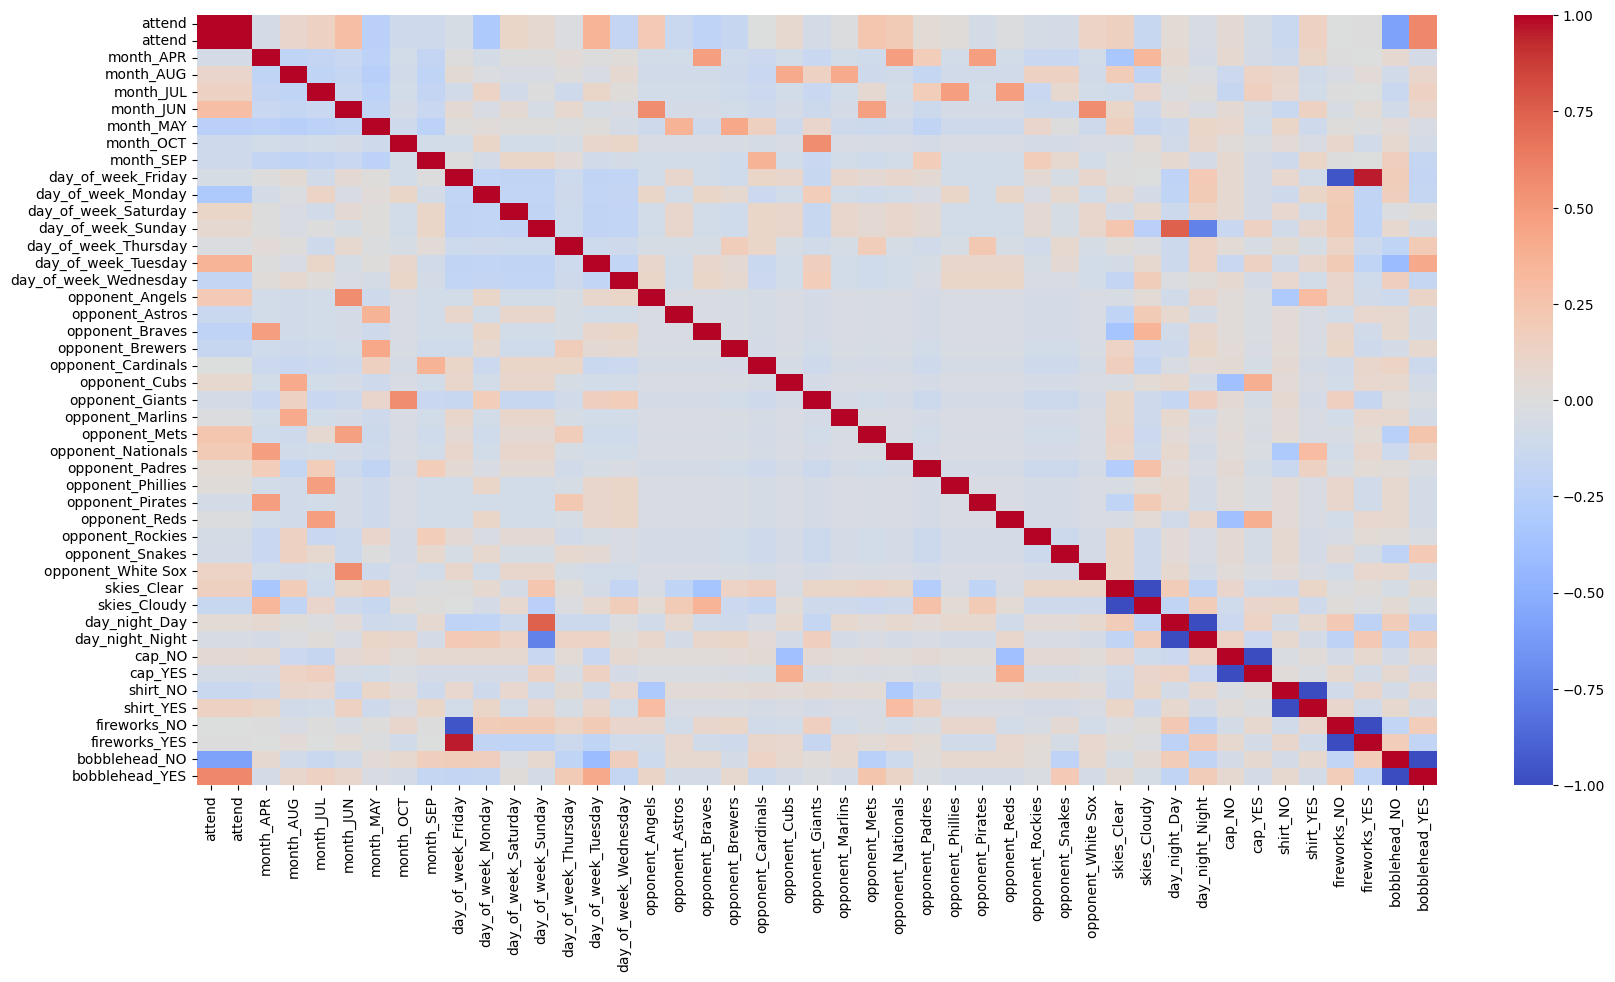

In [63]:
# Calculate the correlation matrix
correlation_matrix = merged.corr()
# Create the heatmap
plt.figure(figsize = (20,10))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

Few Observations after heatmap.
* Month of June, July, August has a positive relationship indicates that the attendance is higher in these months if you compare with others and it is god to play matches in these months. This is probably due to school holidays throughout the nation.
* Doing Firework does not seem to relate much with attendance
* If the match is played against Mets and National the attendance is higher. Should play more matches against these opponents.
* Clear skies has positive relation ship that indicates that weather is pulling audience to the ground. Play more matches during clear skies.